In [108]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


from sklearn.metrics import mean_squared_error, r2_score


In [60]:
student_df = pd.read_csv('./Downloads/student-por.csv')
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,5,4,2,1,2,5,4,10,11,10
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,4,3,4,1,1,1,4,15,15,16
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,1,5,6,11,12,9
647,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,6,10,10,10


HANDLING MULTI-COLINEARITY

<AxesSubplot:>

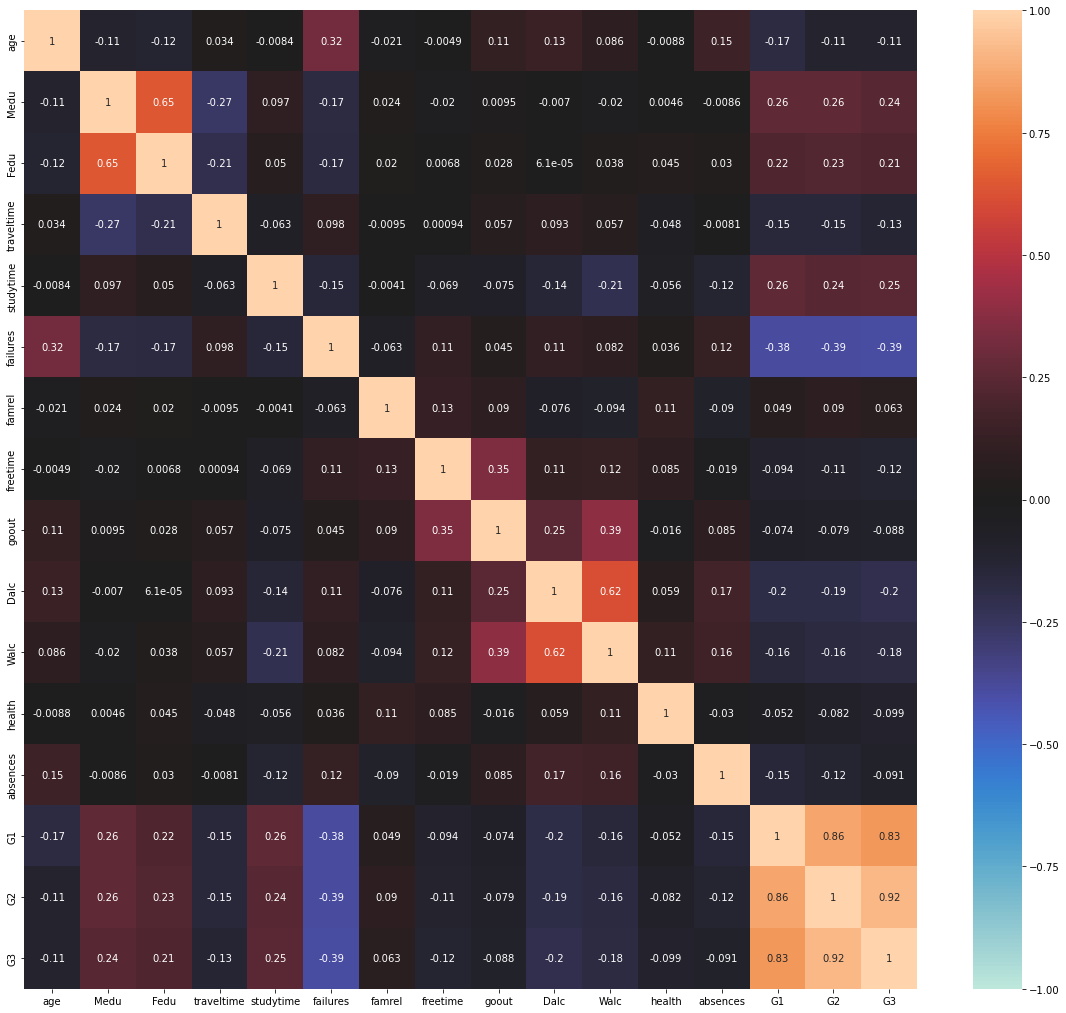

In [61]:
plt.figure(figsize=(20,18))

corr = student_df.corr()
sns.heatmap(corr,vmin=-1,vmax=1,center=0,annot=True)

since both G1 AND G2 have high correlation with the target variable, G3, we'll find the average of the two columns

In [62]:
#finding the average of columns G1 and G2 and adding it as a column to the existing dataframe
G_average = student_df['G1'] + student_df['G2'] / 2
student_df['G_average'] = G_average
student_df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3,G_average
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,3,4,1,1,3,4,0,11,11,5.5
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,3,3,1,1,3,2,9,11,11,14.5
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,3,2,2,3,3,6,12,13,12,18.5
3,GP,F,15,U,GT3,T,4,2,health,services,...,2,2,1,1,5,0,14,14,14,21.0
4,GP,F,16,U,GT3,T,3,3,other,other,...,3,2,1,2,5,0,11,13,13,17.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,MS,F,19,R,GT3,T,2,3,services,other,...,4,2,1,2,5,4,10,11,10,15.5
645,MS,F,18,U,LE3,T,3,1,teacher,services,...,3,4,1,1,1,4,15,15,16,22.5
646,MS,F,18,U,GT3,T,1,1,other,other,...,1,1,1,1,5,6,11,12,9,17.0
647,MS,M,17,U,LE3,T,3,1,services,services,...,4,5,3,4,2,6,10,10,10,15.0


In [63]:
student_df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3', 'G_average'],
      dtype='object')

CHECKING FOR SKEWNESS IN THE COLUMNS

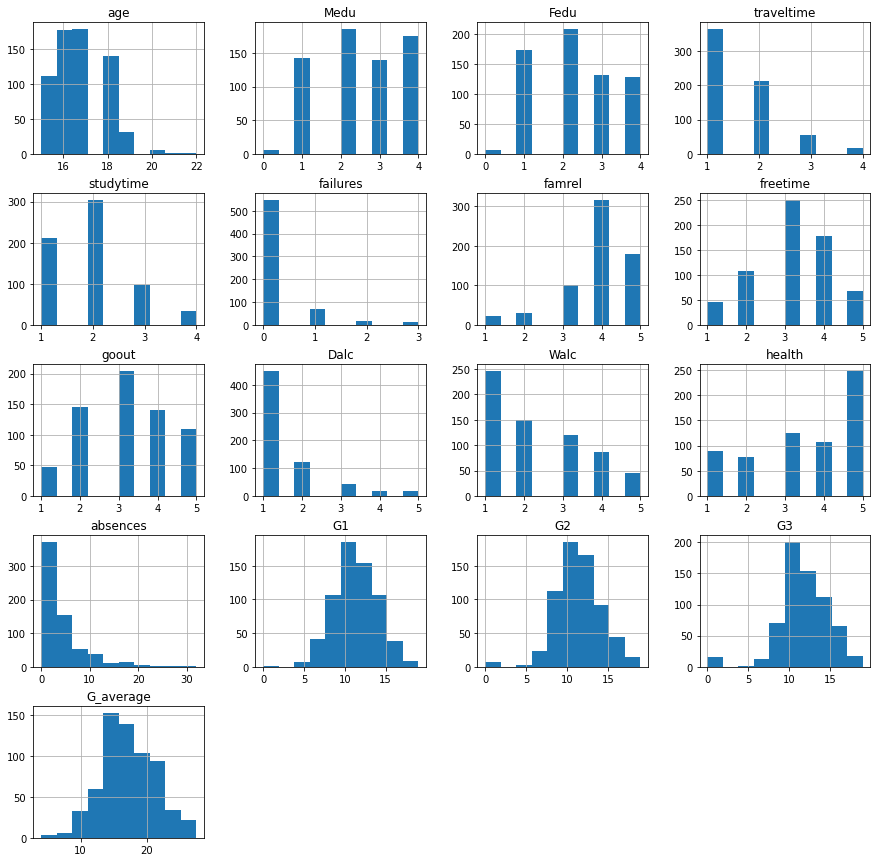

In [64]:

student_df.hist(bins=10, figsize=(15,15))
plt.show();

VISUALIZING SOME COLMNS THAT APPEARED TO BE SKEWED

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' FINAL GRADE")

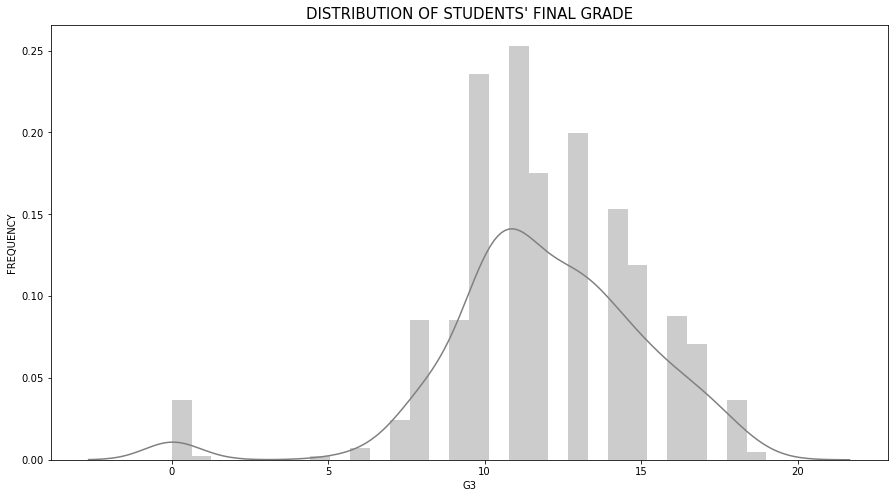

In [65]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['G3'], hist=True, bins=30, color='grey')

plt.xlabel('G3')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' FINAL GRADE",fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' AGES")

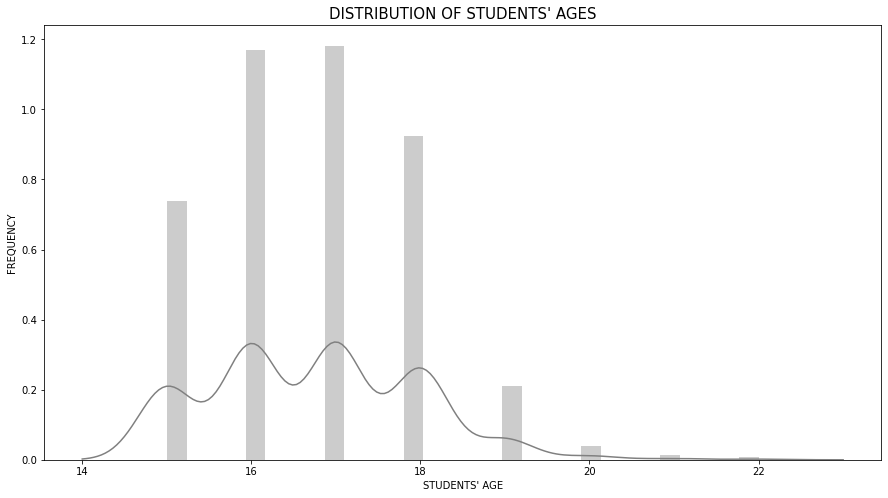

In [66]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['age'], hist=True, bins=30, color='grey')

plt.xlabel("STUDENTS' AGE")
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' AGES",fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS'WORKDAY ALCOHOL CONSUMPTION")

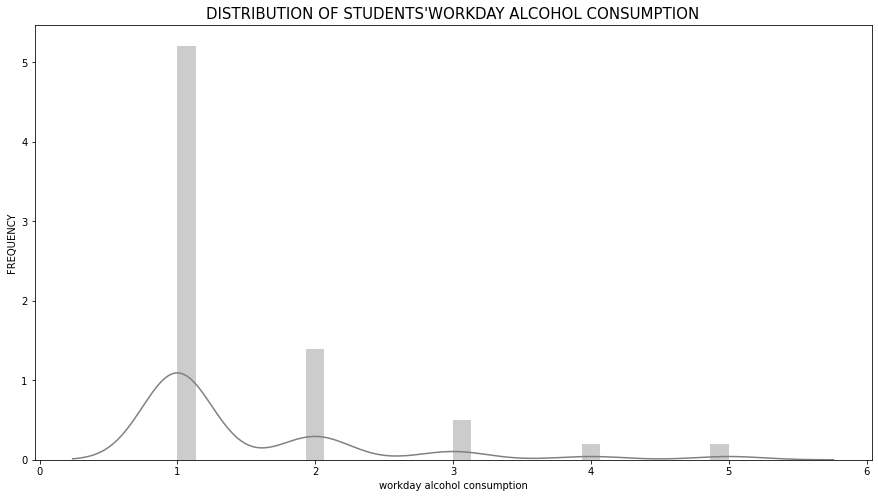

In [67]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['Dalc'], hist=True, bins=30, color='grey')

plt.xlabel('workday alcohol consumption')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS'WORKDAY ALCOHOL CONSUMPTION",fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' NUMBER OF PAST CLASS FAILURES")

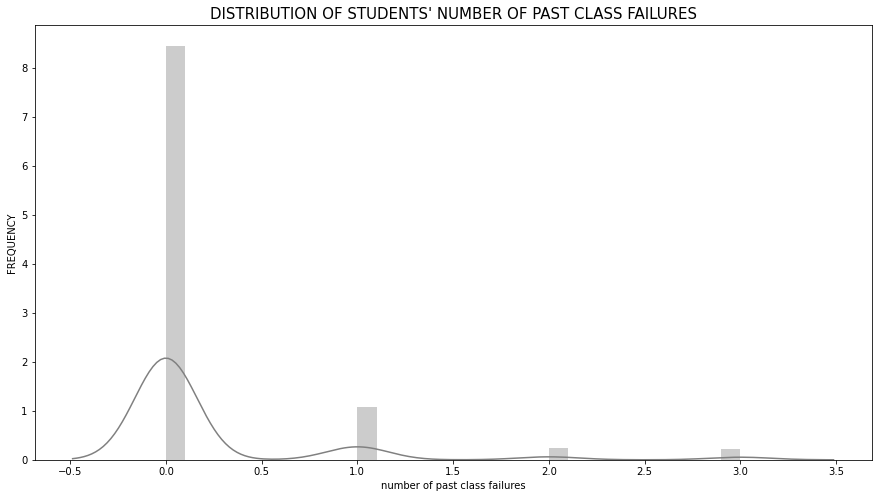

In [68]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['failures'], hist=True, bins=30, color='grey')



plt.xlabel('number of past class failures')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' NUMBER OF PAST CLASS FAILURES",fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' NUMBER OF SCHOOL ABSENCES")

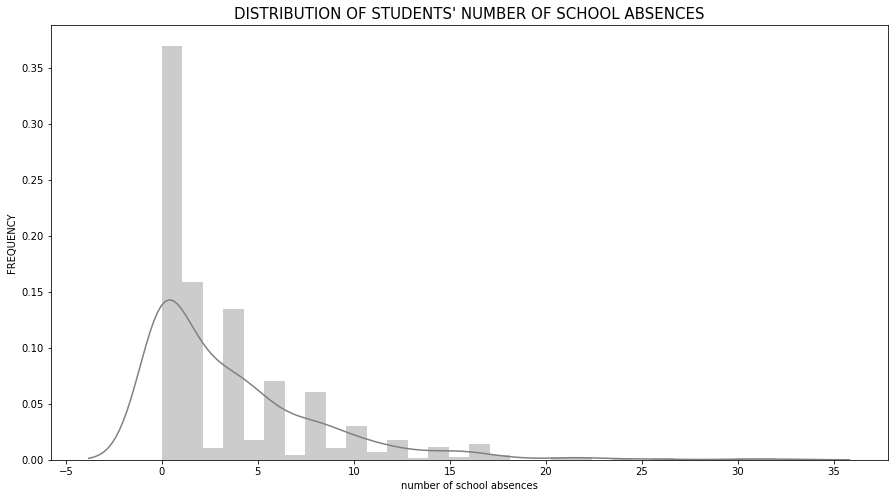

In [69]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['absences'], hist=True, bins=30, color='grey')


plt.xlabel('number of school absences')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' NUMBER OF SCHOOL ABSENCES",fontsize = 15)

C:\Users\user\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, "DISTRIBUTION OF STUDENTS' QUALITY OF FAMILY RELATIONSHIPS")

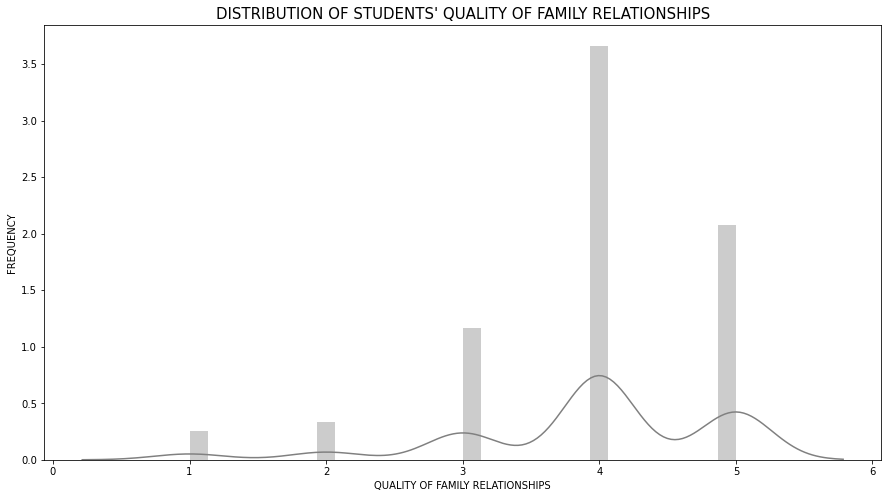

In [70]:
plt.figure(figsize=(15,8))
sns.distplot(student_df['famrel'], hist=True, bins=30, color='grey')

plt.xlabel('QUALITY OF FAMILY RELATIONSHIPS')
plt.ylabel('FREQUENCY')
plt.title("DISTRIBUTION OF STUDENTS' QUALITY OF FAMILY RELATIONSHIPS",fontsize = 15)

now that we haved noticed skewness in the dataset, we will have to perform log transformation and scaling on the dataset.

Before splitting the data into training and testing sets, it is generally recommended to perform log transformation and scaling on it. this ensures that the same transformation is used on both the training and testing sets, which is necessary to avoid bias or leakage in your analysis. 

But before that, we have to encode non-numerical categorical variables

ENCODING

*one-hot encoding will be done on the following columns:

school, sex, address, famsize, pstatus, mjob, fjob, reason, guardian


*    *    *


*Label encoding will be done on the following columns:

schoolsup, famsup, paid, activities, nursery, higher, internet, romantic

In [75]:
#ONE-HOT ENCODING

new_df = student_df.copy()
# Select the columns to encode
columns_to_encode = ['school', 'sex', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 'reason', 'guardian']


encoder = OneHotEncoder(sparse=False)

# Fit and transform the data using the OneHotEncoder
encoded_data = encoder.fit_transform(new_df[columns_to_encode])

# Create a new DataFrame with the encoded data
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names(columns_to_encode))

# Concatenate the encoded DataFrame with the original DataFrame
student_df_encoded = pd.concat([new_df, encoded_df], axis=1)

# Drop the original columns that were encoded
student_df_encoded = student_df_encoded.drop(columns_to_encode, axis=1)

# Print the encoded dataset
student_df_encoded



# Perform one-hot encoding
#student_df_encoded = pd.get_dummies(student_df, columns=columns_to_encode)


C:\Users\user\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,yes,no,no,no,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17,1,1,1,2,0,no,yes,no,no,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,1,1,1,2,0,yes,no,no,no,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,4,2,1,3,0,no,yes,no,yes,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16,3,3,1,2,0,no,yes,no,no,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,no,no,no,yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
645,18,3,1,1,2,0,no,yes,no,no,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,18,1,1,2,2,0,no,no,no,yes,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
647,17,3,1,2,1,0,no,no,no,no,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [76]:
# LABEL ENCODING




# Select the columns to encode
columns_to_encode = ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

# Create a LabelEncoder object for each column to encode
encoders = {}
for col in columns_to_encode:
    encoders[col] = LabelEncoder()
    student_df_encoded[col] = encoders[col].fit_transform(student_df_encoded[col])

# Print the encoded dataset
student_df_encoded


,age,Medu,Fedu,traveltime,studytime,failures,schoolsup,famsup,paid,activities,...,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other
0,18,4,4,2,2,0,1,0,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,17,1,1,1,2,0,0,1,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,15,1,1,1,2,0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
3,15,4,2,1,3,0,0,1,0,1,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,16,3,3,1,2,0,0,1,0,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
644,19,2,3,1,3,1,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
645,18,3,1,1,2,0,0,1,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
646,18,1,1,2,2,0,0,0,0,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
647,17,3,1,2,1,0,0,0,0,0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


NOW THAT THE COLUMNS HAVE BEEN ENCODED, LET'S PERFORM LOG TRANSFORMATION AND SCALING ON THE DATA

In [81]:


#declare input and target variables`
X = student_df_encoded.drop(['G3'], axis = 1)
y = student_df_encoded['G3']

# Apply log transformation to the entire dataset
X_log = np.log(X + 0.1)

# Scale the data using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_log)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


NOW THE DATASET IS READY FOR MODEL TRAINING

MODELS:

*Linear Regression

*Decision Trees

*Random Forest

*Support vector machines.


Now, instead of repeating lines of code, while fitting and predicting with the models, we setup a dictionary with the models in it, and create a function to fit and score the models.

In [83]:
#dictionary
Models = {'Lin_reg': LinearRegression(), 'decision_trees': DecisionTreeClassifier(),
          'Random_forest': RandomForestClassifier(), 'svm' : SVC()}

#function
def fit_and_score_model (Models, X_train, y_train, X_test, y_test):
    np.random.seed(42)
    model_score = {}
    for name,model in Models.items():
    #name = key, model = values (of the dictionary created)
        model.fit(X_train, y_train) #fit model to data
        model_score[name] = model.score(X_test, y_test) #model score
    return model_score

In [84]:
score = fit_and_score_model(Models = Models, X_train = X_train,
                    y_train = y_train, X_test = X_test, y_test = y_test)

score

{'Lin_reg': 0.7838412555290613,
 'decision_trees': 0.47692307692307695,
 'Random_forest': 0.4307692307692308,
 'svm': 0.2230769230769231}

linear regression model has the highest score performance which might probably increase after hyper parameter tuning

METRICS

LINEAR REGRESSION

In [109]:
#creating a function to return the Mean squared error, Root Mean squared error, R-Squared squared

def get_metrics(y_test,lin_reg_pred ):
    
    lin_reg = LinearRegression()
    lin_reg.fit(X_train, y_train)
    lin_reg_pred = lin_reg.predict(X_test)
    
    mse = mean_squared_error(y_test, lin_reg_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, lin_reg_pred)
    
    print("Mean squared error:", round(mse,2))
    print("Root Mean squared error:", round(rmse,2))
    print("R-Squared squared:", round(r2,2))

   # return mse, rmse, r2

In [110]:
get_metrics(y_test, lin_reg_pred)

Mean squared error: 2.11
Root Mean squared error: 1.45
R-Squared squared: 0.78
